# Heart Disease Prediction

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# from sklearn.compose import ColumnTransformer
# ## encoding categorical data
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.model_selection import RandomizedSearchCV

## Importing the DataSet

In [6]:
dataset = pd.read_csv("C://Users//maitrik//Desktop//HealthCare//DataSet//heart.csv")

In [7]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Visualising the DataSet

Text(0, 0.5, 'values')

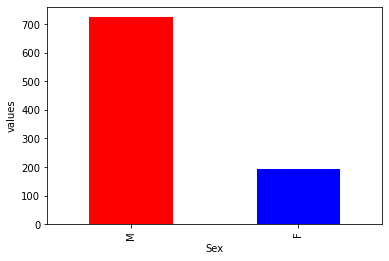

In [10]:
dataset['Sex'].value_counts().plot.bar(color = ['red','blue'])
plt.xlabel('Sex')
plt.ylabel('values')

Text(0, 0.5, 'values')

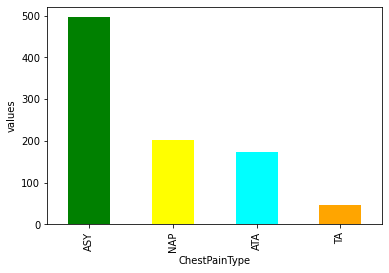

In [11]:
dataset['ChestPainType'].value_counts().plot.bar(color = ['green','yellow','cyan','orange'])
plt.xlabel('ChestPainType')
plt.ylabel('values')

Text(0, 0.5, 'values')

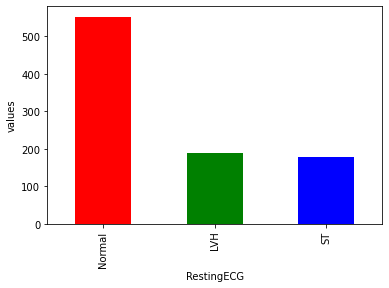

In [12]:
dataset['RestingECG'].value_counts().plot.bar(color=['red', 'green','blue']) #most passengers wanted to visit TRAPIST-1e
plt.xlabel('RestingECG')
plt.ylabel('values')

Text(0, 0.5, 'values')

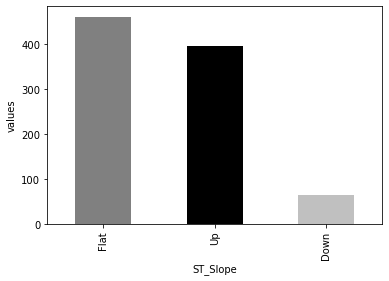

In [13]:
dataset['ST_Slope'].value_counts().plot.bar(color=['grey', 'black','silver'],) #most passengers wanted to visit TRAPIST-1e
plt.xlabel('ST_Slope')
plt.ylabel('values')

<AxesSubplot:>

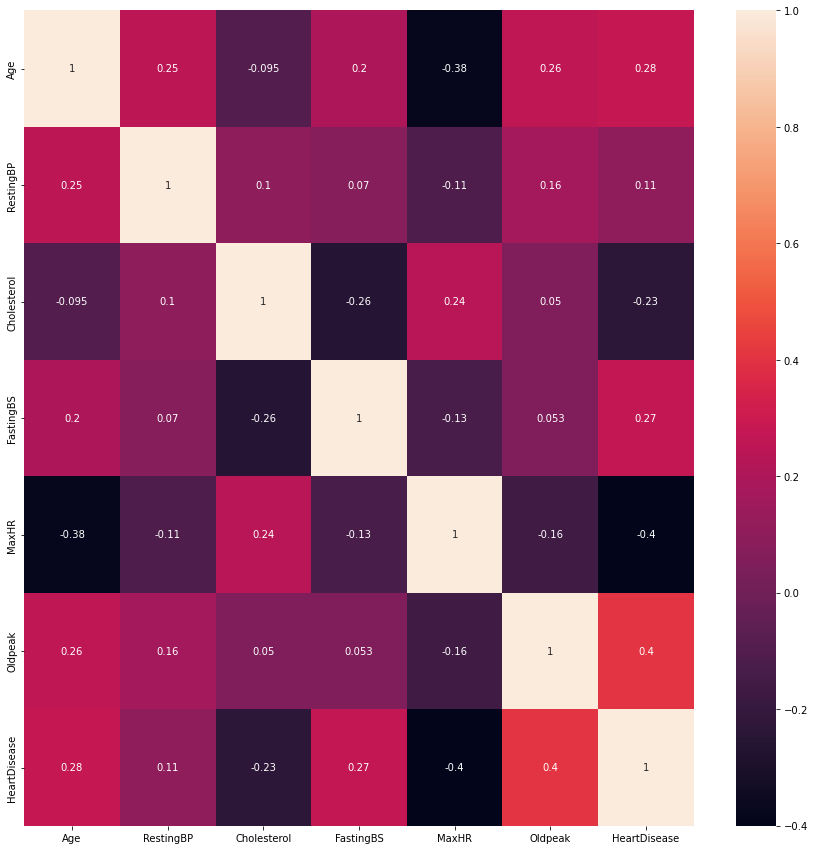

In [14]:
plt.figure(figsize = (15,15))
sns.heatmap(dataset.corr(), annot = True)

C:\Users\maitrik\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

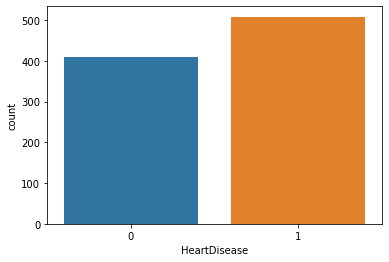

In [15]:
sns.countplot(dataset["HeartDisease"])

In [16]:
X = dataset.drop(columns =['HeartDisease'],axis = 1)
y = dataset['HeartDisease']
X.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [17]:
x_train,x_test,y_train,y_test =  train_test_split(X,y, test_size = 0.2, random_state = 0)

In [18]:
x_train = pd.get_dummies(x_train,columns=['ChestPainType','Sex','RestingECG','ExerciseAngina','ST_Slope'])
x_test = pd.get_dummies(x_test,columns=['ChestPainType','Sex','RestingECG','ExerciseAngina','ST_Slope'])
x_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_F,Sex_M,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
378,70,140,0,1,157,2.0,1,0,0,0,0,1,0,1,0,0,1,0,1,0
356,46,115,0,0,113,1.5,1,0,0,0,0,1,0,1,0,0,1,0,1,0
738,65,160,360,0,151,0.8,0,0,1,0,1,0,1,0,0,1,0,0,0,1
85,66,140,139,0,94,1.0,1,0,0,0,0,1,0,1,0,0,1,0,1,0
427,59,140,0,0,117,1.0,1,0,0,0,0,1,0,0,1,0,1,0,1,0


## Model Training (Random Forest)

In [19]:
RNF = RandomForestClassifier(n_estimators=150,criterion='gini',max_depth=90,max_leaf_nodes=120
                              ,verbose=1)

RNF.fit(x_train, y_train)
y_predict=RNF.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


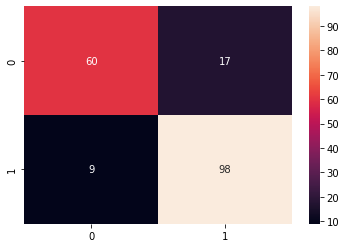

In [20]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm,annot= True);

In [21]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        77
           1       0.85      0.92      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



## Hyperparameter Tuning

In [22]:
classifier = RandomForestClassifier(n_jobs = -1)

In [23]:
from scipy.stats import randint
param_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,31),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,31),
              }

In [24]:
search_clfr = RandomizedSearchCV(classifier, param_distributions = param_dist, n_jobs=-1, n_iter = 40, cv = 9)

In [25]:
search_clfr.fit(x_train, y_train)

C:\Users\maitrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.87067148 0.82983706 0.85432768 0.84753588 0.83259728 0.83806752
 0.8774131         nan        nan 0.87875138 0.85439459 0.83937234
        nan 0.85703771 0.85571615 0.86657299 0.84890762 0.85432768
 0.85842618        nan 0.87339824 0.85024591 0.84211583        nan
        nan 0.85158419 0.85300612 0.8447924  0.86928301        nan
 0.86252467 0.86518452 0.83806752        nan 0.87466961 0.84345411
 0.8461976  0.85708789        nan 0.85436114]
  warnings.warn(


RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(n_jobs=-1), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EBDD447F70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EBDD4613D0>,
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]})

In [26]:
model = RandomForestClassifier(n_jobs=-1, n_estimators=400,bootstrap= False,criterion='gini',max_depth=10,max_features=3,min_samples_leaf= 7)

In [27]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features=3,
                       min_samples_leaf=7, n_estimators=400, n_jobs=-1)

In [28]:
y_predict= model.predict(x_test)

In [29]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.74      0.80        77
           1       0.83      0.92      0.87       107

    accuracy                           0.84       184
   macro avg       0.85      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



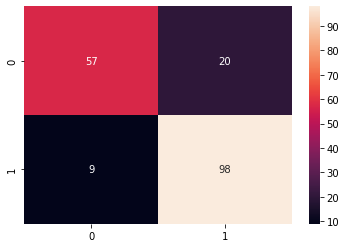

In [30]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm,annot= True);

In [31]:
maxValues = dataset.max()
 
print(maxValues)

Age                77
Sex                 M
ChestPainType      TA
RestingBP         200
Cholesterol       603
FastingBS           1
RestingECG         ST
MaxHR             202
ExerciseAngina      Y
Oldpeak           6.2
ST_Slope           Up
HeartDisease        1
dtype: object


In [34]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 378 to 684
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                734 non-null    int64  
 1   RestingBP          734 non-null    int64  
 2   Cholesterol        734 non-null    int64  
 3   FastingBS          734 non-null    int64  
 4   MaxHR              734 non-null    int64  
 5   Oldpeak            734 non-null    float64
 6   ChestPainType_ASY  734 non-null    uint8  
 7   ChestPainType_ATA  734 non-null    uint8  
 8   ChestPainType_NAP  734 non-null    uint8  
 9   ChestPainType_TA   734 non-null    uint8  
 10  Sex_F              734 non-null    uint8  
 11  Sex_M              734 non-null    uint8  
 12  RestingECG_LVH     734 non-null    uint8  
 13  RestingECG_Normal  734 non-null    uint8  
 14  RestingECG_ST      734 non-null    uint8  
 15  ExerciseAngina_N   734 non-null    uint8  
 16  ExerciseAngina_Y   734 n

In [32]:
minValues = dataset.min()
 
print(minValues)

Age                 28
Sex                  F
ChestPainType      ASY
RestingBP            0
Cholesterol          0
FastingBS            0
RestingECG         LVH
MaxHR               60
ExerciseAngina       N
Oldpeak           -2.6
ST_Slope          Down
HeartDisease         0
dtype: object


In [33]:
import pickle
pickle.dump(RNF, open("heart.pkl",'wb'))